In [17]:
import torch

torch.set_printoptions(precision=2, sci_mode=False)

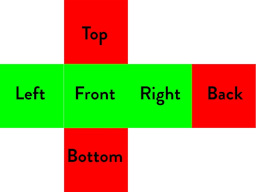

In [2]:
def create_side(n):
    pass

x = torch.tensor([1, 2, 3])
y = torch.tensor([4, 5, 6])
x, y

(tensor([1, 2, 3]), tensor([4, 5, 6]))

In [4]:
grid_x, grid_y = torch.meshgrid(x, y)
grid_x, grid_y

(tensor([[1, 1, 1],
         [2, 2, 2],
         [3, 3, 3]]),
 tensor([[4, 5, 6],
         [4, 5, 6],
         [4, 5, 6]]))

In [13]:
torch.stack((grid_x, grid_y), dim=-1)#.shape

tensor([[[1, 4],
         [1, 5],
         [1, 6]],

        [[2, 4],
         [2, 5],
         [2, 6]],

        [[3, 4],
         [3, 5],
         [3, 6]]])

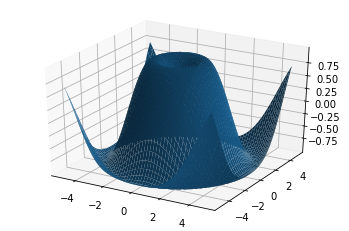

In [8]:
import matplotlib.pyplot as plt

xs = torch.linspace(-5, 5, steps=100)
ys = torch.linspace(-5, 5, steps=100)

x, y = torch.meshgrid(xs, ys)


z = torch.sin(torch.sqrt(x * x + y * y))
ax = plt.axes(projection='3d')
ax.plot_surface(x.numpy(), y.numpy(), z.numpy())
plt.show()

In [23]:
s = torch.linspace(-0.5, 0.5, steps=3)
s

tensor([-0.50,  0.00,  0.50])

In [32]:
xys = torch.stack(torch.meshgrid(
    torch.linspace(-0.5, +0.5, steps=3), 
    torch.linspace(-0.5, +0.5, steps=3)), dim=-1)
print(xys.shape)
xys

torch.Size([3, 3, 2])


tensor([[[-0.50, -0.50],
         [-0.50,  0.00],
         [-0.50,  0.50]],

        [[ 0.00, -0.50],
         [ 0.00,  0.00],
         [ 0.00,  0.50]],

        [[ 0.50, -0.50],
         [ 0.50,  0.00],
         [ 0.50,  0.50]]])

In [39]:
zs = torch.full((3, 3), 0.5)
print(zs.shape)
zs

torch.Size([3, 3])


tensor([[0.50, 0.50, 0.50],
        [0.50, 0.50, 0.50],
        [0.50, 0.50, 0.50]])

In [36]:
front = torch.cat((xys[:, :, 0:1], xys[:, :, 1:2], zs), dim=-1)

tensor([[[-0.50, -0.50,  0.50],
         [-0.50,  0.00,  0.50],
         [-0.50,  0.50,  0.50]],

        [[ 0.00, -0.50,  0.50],
         [ 0.00,  0.00,  0.50],
         [ 0.00,  0.50,  0.50]],

        [[ 0.50, -0.50,  0.50],
         [ 0.50,  0.00,  0.50],
         [ 0.50,  0.50,  0.50]]])

In [37]:
xs, ys = torch.meshgrid(
    torch.linspace(-0.5, +0.5, steps=3), 
    torch.linspace(-0.5, +0.5, steps=3))

xs.shape, ys.shape

(torch.Size([3, 3]), torch.Size([3, 3]))

In [41]:
zs = torch.full((3, 3), 0.5)
front = torch.stack((xs, ys, zs), dim=-1)
front

tensor([[[-0.50, -0.50,  0.50],
         [-0.50,  0.00,  0.50],
         [-0.50,  0.50,  0.50]],

        [[ 0.00, -0.50,  0.50],
         [ 0.00,  0.00,  0.50],
         [ 0.00,  0.50,  0.50]],

        [[ 0.50, -0.50,  0.50],
         [ 0.50,  0.00,  0.50],
         [ 0.50,  0.50,  0.50]]])

In [42]:
back = torch.stack((xs, ys, -zs), dim=-1)
back

tensor([[[-0.50, -0.50, -0.50],
         [-0.50,  0.00, -0.50],
         [-0.50,  0.50, -0.50]],

        [[ 0.00, -0.50, -0.50],
         [ 0.00,  0.00, -0.50],
         [ 0.00,  0.50, -0.50]],

        [[ 0.50, -0.50, -0.50],
         [ 0.50,  0.00, -0.50],
         [ 0.50,  0.50, -0.50]]])

torch.Size([3, 3, 3])


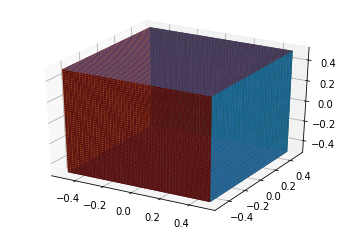

In [67]:
def make_sides(n, start=-0.5, end=0.5):
    d1, d2 = torch.meshgrid(
        torch.linspace(start, end, steps=n), 
        torch.linspace(start, end, steps=n))
    d3 = torch.full_like(d1, end)
    
    front = torch.stack((+d3, d1, d2), dim=-1)
    back  = torch.stack((-d3, d1, d2), dim=-1)
    
    left  = torch.stack((d1, +d3, d2), dim=-1)
    right = torch.stack((d1, -d3, d2), dim=-1)
    
    top   = torch.stack((d1, d2, +d3), dim=-1)
    down  = torch.stack((d1, d2, -d3), dim=-1)
    
    return {
        'front': front,
        'back': back,
        'left': left,
        'right': right,
        'top': top,
        'down': down,
    }

res = make_sides(3)
print(res['front'].shape)


ax = plt.axes(projection='3d')

res = make_sides(300)
for key in res:
    side = res[key]#.reshape(-1, 3)
    x, y, z = side[:, :, 0], side[:, :, 1], side[:, :, 2]
    ax.plot_surface(x.numpy(), y.numpy(), z.numpy())
plt.show()

In [58]:
xs, ys = torch.meshgrid(
    torch.linspace(-0.5, +0.5, steps=3), 
    torch.linspace(-0.5, +0.5, steps=3))
xs.shape

torch.Size([3, 3])

In [ ]:
# 1 Create faces for the box
# 2 Create padding for the box sides